Dataset Loaded Successfully!
       carat        cut color clarity  depth  table  house_price     x     y  \
1388    0.24      Ideal     G    VVS1   62.1   56.0          559  3.97  4.00   
50052   0.58  Very Good     F    VVS2   60.0   57.0         2201  5.44  5.42   
41645   0.40      Ideal     E    VVS2   62.1   55.0         1238  4.76  4.74   
42377   0.43    Premium     E    VVS2   60.8   57.0         1304  4.92  4.89   
17244   1.55      Ideal     E     SI2   62.3   55.0         6901  7.44  7.37   

          z  
1388   2.47  
50052  3.26  
41645  2.95  
42377  2.98  
17244  4.61  

Shape: (5000, 10)
Missing values: 0

Categorical Columns: ['cut', 'color', 'clarity']

All columns after encoding are numeric: True

Linear Regression: RMSE=1438.38, R2=0.879

Decision Tree: RMSE=1028.53, R2=0.938

Random Forest: RMSE=776.36, R2=0.965

Gradient Boosting: RMSE=801.16, R2=0.962

Model Comparison:
                          RMSE        R2
Random Forest       776.358883  0.964638
Gradient B

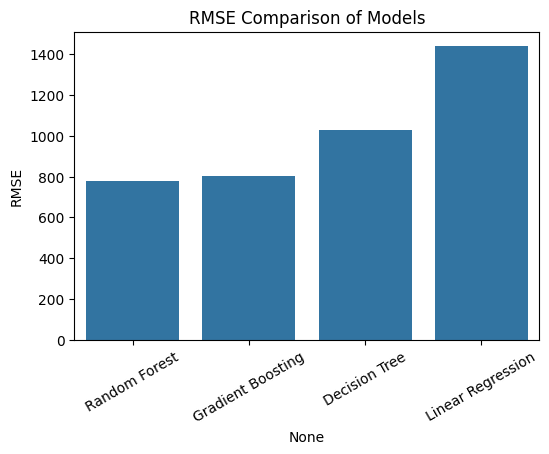


🏆 Best Model: Random Forest
Model saved as 'best_model.pkl'

✅ Project Completed Successfully!


In [5]:
# =============================================
# 🏠 House Price Prediction Pipeline (Final)
# Author: Hassan daood
# =============================================

# ✅ Step 1: Install libraries
!pip install pandas numpy scikit-learn matplotlib seaborn joblib -q

# ✅ Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# ✅ Step 3: Load dataset
df = sns.load_dataset("diamonds").sample(5000, random_state=42)
df.rename(columns={"price": "house_price"}, inplace=True)
print("Dataset Loaded Successfully!")
print(df.head())

# ✅ Step 4: Basic Info
print("\nShape:", df.shape)
print("Missing values:", df.isnull().sum().sum())

# ✅ Step 5: Encode categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns
print("\nCategorical Columns:", list(cat_cols))

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("\nAll columns after encoding are numeric:",
      all(df.dtypes != "object"))

# ✅ Step 6: Split features & target
X = df.drop("house_price", axis=1)
y = df["house_price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ✅ Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 8: Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# ✅ Step 9: Train & Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "R2": r2}
    print(f"\n{name}: RMSE={rmse:.2f}, R2={r2:.3f}")

# ✅ Step 10: Compare Results
results_df = pd.DataFrame(results).T.sort_values("RMSE")
print("\nModel Comparison:")
print(results_df)

# ✅ Step 11: Visualization
plt.figure(figsize=(6,4))
sns.barplot(x=results_df.index, y=results_df["RMSE"])
plt.title("RMSE Comparison of Models")
plt.xticks(rotation=30)
plt.show()

# ✅ Step 12: Best Model
best_model_name = results_df.index[0]
print(f"\n🏆 Best Model: {best_model_name}")

# ✅ Step 13: Save Best Model
joblib.dump(models[best_model_name], "best_model.pkl")
print("Model saved as 'best_model.pkl'")

print("\n✅ Project Completed Successfully!")
